<a href="https://colab.research.google.com/github/sisomimoctrl/asset-allocation/blob/main/permanent_spy_tlt_gld_bil_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bt yfinance quantstats

In [ ]:
import bt
import yfinance as yf
import pandas as pd
import quantstats as qs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
tickers = ['spy', 'tlt', 'gld', 'bil']
df = yf.download(tickers, end='2022-4-30')['Adj Close']

df.info()

[*********************100%***********************]  4 of 4 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7367 entries, 1993-01-29 to 2022-04-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIL     3758 non-null   float64
 1   GLD     4392 non-null   float64
 2   SPY     7367 non-null   float64
 3   TLT     4974 non-null   float64
dtypes: float64(4)
memory usage: 287.8 KB


In [ ]:
for c in df.columns:
    print(c, df[c].first_valid_index(), ',', df[c].last_valid_index())

BIL 2007-05-30 00:00:00 , 2022-04-29 00:00:00
GLD 2004-11-18 00:00:00 , 2022-04-29 00:00:00
SPY 1993-01-29 00:00:00 , 2022-04-29 00:00:00
TLT 2002-07-30 00:00:00 , 2022-04-29 00:00:00


In [ ]:
start = '2008-1-1'
end = '2022-4-30'

data = df[start:].copy()

In [ ]:
print(data.corr())
print(data.resample('M').last().corr())

          BIL       GLD       SPY       TLT
BIL  1.000000  0.620039  0.861229  0.807206
GLD  0.620039  1.000000  0.543568  0.611458
SPY  0.861229  0.543568  1.000000  0.877599
TLT  0.807206  0.611458  0.877599  1.000000
          BIL       GLD       SPY       TLT
BIL  1.000000  0.617270  0.862483  0.806710
GLD  0.617270  1.000000  0.540311  0.605798
SPY  0.862483  0.540311  1.000000  0.877117
TLT  0.806710  0.605798  0.877117  1.000000


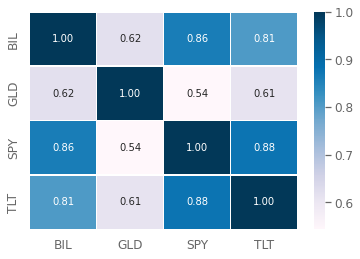

In [ ]:
sns.heatmap(data=data.corr(), annot=True, fmt='.2f', linewidths=.5, cmap=plt.cm.PuBu)

In [ ]:
def long_only_ew(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(
        name, 
        [bt.algos.RunOnce(),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t 

def strategy_permanent(name, data, tickers, initial_capital=100000000.0):
    s = bt.Strategy(        
        name, 
        [bt.algos.RunYearly(
            run_on_first_date=True, 
            run_on_end_of_period=True, 
            run_on_last_date=False),
         bt.algos.SelectThese(tickers),
         bt.algos.WeighEqually(),
         bt.algos.PrintDate(),
         bt.algos.PrintTempData(),
         bt.algos.Rebalance()])
    t = bt.Backtest(s, data, initial_capital=initial_capital)
    return t

bt_spy = long_only_ew('SPY', data, ['SPY'])
bt_permanent = strategy_permanent('Permanent', data, ['SPY', 'TLT','GLD','BIL'])

res = bt.run(bt_permanent, bt_spy)

2008-01-02 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2008-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2009-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2010-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2011-12-30 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2012-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2013-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GLD': 0.25, 'BIL': 0.25}}
2014-12-31 00:00:00
{'selected': ['SPY', 'TLT', 'GLD', 'BIL'], 'weights': {'SPY': 0.25, 'TLT': 0.25, 'GL

In [ ]:
res.display()

Stat                 Permanent    SPY
-------------------  -----------  ----------
Start                2008-01-01   2008-01-01
End                  2022-04-29   2022-04-29
Risk-free rate       0.00%        0.00%

Total Return         124.81%      276.70%
Daily Sharpe         0.85         0.55
Daily Sortino        1.37         0.85
CAGR                 5.82%        9.70%
Max Drawdown         -14.44%      -51.87%
Calmar Ratio         0.40         0.19

MTD                  -4.86%       -8.78%
3m                   -4.10%       -6.49%
6m                   -5.39%       -9.69%
YTD                  -7.14%       -12.99%
1Y                   -1.01%       -0.63%
3Y (ann.)            7.58%        13.77%
5Y (ann.)            6.44%        13.52%
10Y (ann.)           4.82%        13.55%
Since Incep. (ann.)  5.82%        9.70%

Daily Sharpe         0.85         0.55
Daily Sortino        1.37         0.85
Daily Mean (ann.)    5.90%        11.37%
Daily Vol (ann.)     6.92%        20.52%
Daily Skew    

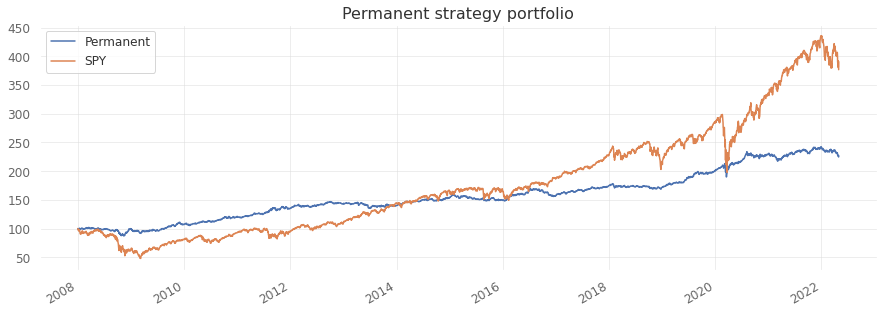

In [ ]:
res.plot()
plt.title('Permanent strategy portfolio', fontsize=16)
plt.legend(ncol=1)
plt.show()

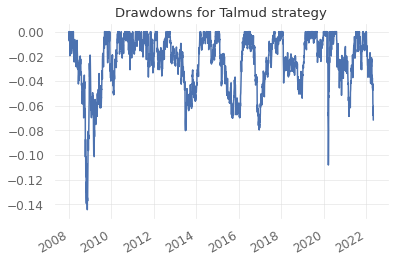

In [ ]:
res.backtests['Permanent'].stats.drawdown[:].plot()
plt.title('Drawdowns for Talmud strategy')
plt.show()

In [ ]:
res.backtests['Permanent'].stats.drawdown_details.sort_values(by='drawdown', ascending=True).head(5)

,Start,End,Length,drawdown
5,2008-03-19 00:00:00,2009-09-04 00:00:00,534,-0.144415
127,2020-03-09 00:00:00,2020-04-16 00:00:00,38,-0.108168
63,2012-10-05 00:00:00,2014-03-12 00:00:00,523,-0.080292
94,2016-07-11 00:00:00,2017-08-28 00:00:00,413,-0.079725
148,2021-12-28 00:00:00,2022-04-29 00:00:00,122,-0.071749


In [ ]:
res.backtests['Permanent'].stats.drawdown_details.sort_values(by='Length', ascending=False).head(5)

,Start,End,Length,drawdown
5,2008-03-19 00:00:00,2009-09-04 00:00:00,534,-0.144415
63,2012-10-05 00:00:00,2014-03-12 00:00:00,523,-0.080292
82,2015-01-26 00:00:00,2016-04-07 00:00:00,437,-0.070248
94,2016-07-11 00:00:00,2017-08-28 00:00:00,413,-0.079725
103,2018-01-29 00:00:00,2019-02-19 00:00:00,386,-0.053962


In [ ]:
res.display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2008   0.86   0.72  -1.29  -0.67  -0.05  -0.17  -0.64  -1.44  -0.63  -8.21   5.74   6.35  -0.18
  2009  -3.89  -2.52   2.02  -0.21   3.4   -1.34   2.73   1.51   3.06  -0.06   5.57  -2.84   7.21
  2010  -0.55   1.47   0.87   2.67   0.03   0.92  -0.12   2.66   2.51   0.67   0.15   1.36  13.32
  2011  -1.78   2.74   0.4    3.55   0.07  -1.63   2.72   4.38  -1.26   2.64   0.92  -1.67  11.36
  2012   3.92  -0.32  -0.49   0.87  -1.12   1.17   1.48   1.52   1.22  -1.37   0.31  -0.99   6.24
  2013   0.36  -0.63   1.13  -0.13  -2.4   -3.51   2.44  -0.18   0.07   1.68  -0.79  -0.29  -2.37
  2014   1.55   2.82  -0.44   0.84   0.56   1.99  -1.1    2.34  -2.44   0.65   1.43   1.15   9.63
  2015   3.88  -1.85  -0.66  -0.68  -0.14  -1.9    0     -0.9   -0.59   2.51  -1.75  -0.64  -2.84
  2016   1.51   3.62